# HW 2
Reginald Hart

April 14, 2023

In this problem, consider the simple (i.e. nondamped, nondriven) pendulum that is not in the small-angle limit.  Your textbook calls this pendulum the non-linear pendulum.

Show that the Euler method to solve for the motion of the pendulum does not work, and show that the Runge-Kutta method does work.  By "work", I mean that the Euler method does not conserve energy, but the RK method does conserve energy.

Now that you have working code, answer this question:  Does the frequency of a pendulum depend on its amplitude?  Explain why your answer makes sense.

# WHY [Are We Here?]
***
In this problem we construct a model of a pendulum within code which is not damped, driven, nor does it have a small aangle limit.

The goal is tho show that the Euler method to solve the motion of the pendulum does not work. Following this conclusion, we show that the Runge-Kutta method does work.

We will find that the Euler method does not conserve energy (does not work), while the RK method does.

$$
F_θ = -mg\ sin\ θ
$$

In absence of a dampening or driving force, this pendulum should oscillate in perpetuity and should neither increase nor decrease in energy, frequency, and amplitude.


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#WHAT [Calculations Do You Do?]
***

Newton's 2nd law states F = ma, so:

$$
F_θ = m \frac{d^2s}{dt^2}
$$

Where s is the arclength = Lθ

Because L is fixed, the only thing changing with respect to time is theta, so (m cancels):

$$
\frac{d^2θ}{dt^2} = -\frac gL\ sin\ θ
$$

We can break this into two differential equaitons and use the Euler method (for the moment) to see what happens.

ω is the angular frequency and θ is the angle.

Euler approximation of ω

$$
\frac{dω}{dt} = -\frac gL\ sin\ θ →
$$

$$
ω = ω - \frac gL\ sin\ θ\ Δt
$$

Euler approcimation of θ:

$$
\frac{dθ}{dt} = ω
$$

$$
θ = θ + ω\ Δt
$$

In [ ]:
# Begin by initializing values.
dt = 0.01
steps = 1000
omega = np.zeros(steps)
theta = np.zeros(steps)
t = np.zeros(steps)
t[0] = 0
omega[0] = 0.
theta[0] = 1 # starting angle of 1 radian approximately 60 degrees
g = 10
L = 1.

#HOW [Do You Know the Computer is Doing What You Think it is Doing?]
***

If the computer is doing what I think it's doing. It will increase in amplitude because each correction is dependent on the previous calculation. This error will get worse and worse over time.

In [ ]:
# Begin loop using Euler method and recalculating each step until steps run out.
for i in range(steps-1):
    omega[i+1] = omega[i] - (g/L)*np.sin(theta[i])*dt
    theta[i+1] = theta[i] + omega[i]*dt
    t[i+1] = t[i] + dt

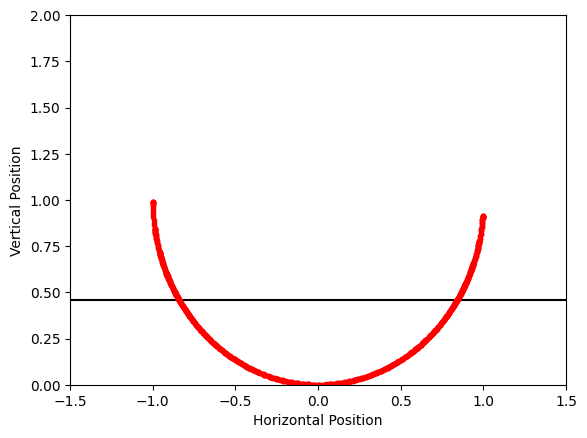

In [ ]:
# Plotting height vs the horizontal position of the pendulum.
# The horizontal line is the origincal vertical position of the pendulum. If the code is working properly, it should bypass this position.
# In the Euler method of oscillatory motion, energy is not conserved.
fig, ax = plt.subplots(1, 1)
plt.axhline( y = 0.4597 , color = 'k', linestyle = '-' ) # y = L * (1 - np.cos(theta)) wasnt working for some reason, so I just calculated and input the value.
plt.xlim(-1.5,1.5)
plt.ylim(0,2)
plt.plot(L*np.sin(theta),L*(1-np.cos(theta)), 'r.')
ax.set_ylabel('Vertical Position')
ax.set_xlabel('Horizontal Position')
plt.show()

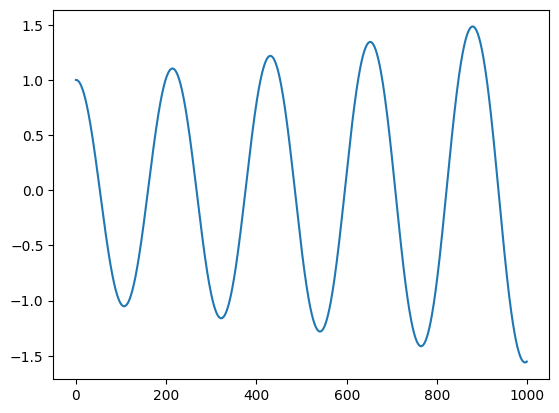

In [ ]:
#plot the angle in radians vs steps.
plt.plot(theta)

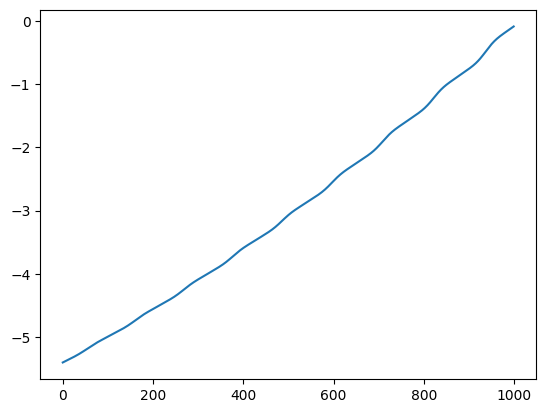

In [ ]:
plt.plot(0.5*L**2*omega**2 - g*L*np.cos(theta))

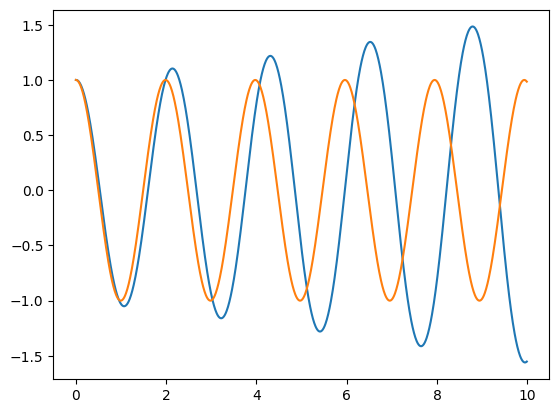

In [ ]:
#Angle vs time
plt.plot(t,theta)
plt.plot(t,theta[0]*np.cos(np.sqrt(g/L)*t))

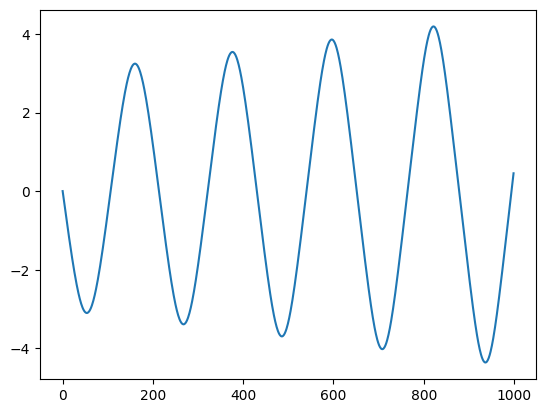

In [ ]:
plt.plot(omega)

As expected, the angle increases over time thus showing that in Eulers approximation. Energy is not conserved.

## End Euler Method ⇒ Begin Runge-Kutta Method

If the comptuer is doing what I think it's doing, energy will be conserved (well, more conserved than Eulers method.).

This method used is the 2nd order Runge-Kutta method, also known as the midpont method.

It effectively calculates the derivative of the function at two points within each step in order to estimate the next value. This single extra step should increase the accuracy of our approximation by a very large margin.

In [ ]:
# Create loop with half steps defined and added to the iteration process.
for i in range(steps-1):
    omegahalf = omega[i] - (g/L)*np.sin(theta[i])*(dt/2)
    thetahalf = theta[i] + omega[i]*(dt/2)
    omega[i+1] = omega[i] - (g/L)*np.sin(thetahalf)*dt
    theta[i+1] = theta[i] + omegahalf*dt
    t[i+1] = t[i] + dt

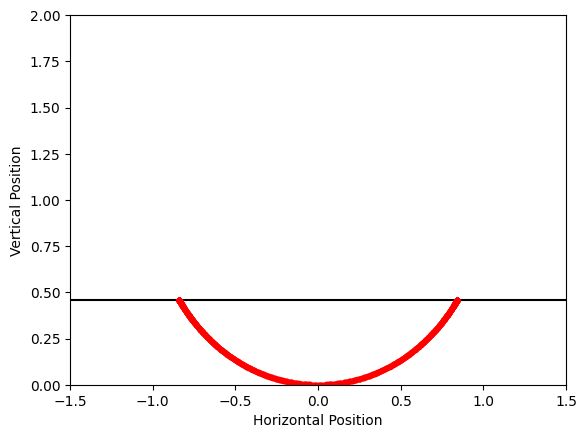

In [ ]:
# The horizontal line is the origincal vertical position of the pendulum. If the code is working properly, the pendulum should not pass this line (appreciably).

fig, ax = plt.subplots(1, 1)
plt.axhline( y = 0.4597 , color = 'k', linestyle = '-' ) # y = L * (1 - np.cos(theta)) wasnt working for some reason, so I just calculated and input the value.
plt.xlim(-1.5,1.5)
plt.ylim(0,2)
plt.plot(L*np.sin(theta),L*(1-np.cos(theta)), 'r.')
ax.set_ylabel('Vertical Position')
ax.set_xlabel('Horizontal Position')
plt.show()

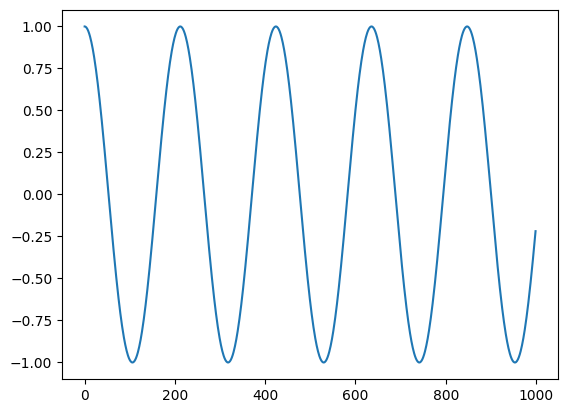

In [ ]:
#plot the angle in radians vs steps.
plt.plot(theta)

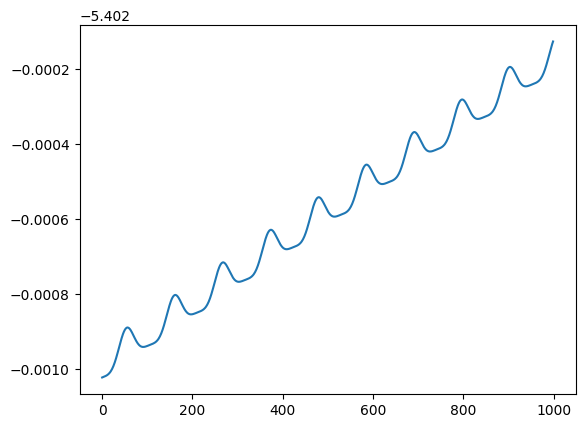

In [ ]:
plt.plot(0.5*L**2*omega**2 - g*L*np.cos(theta))

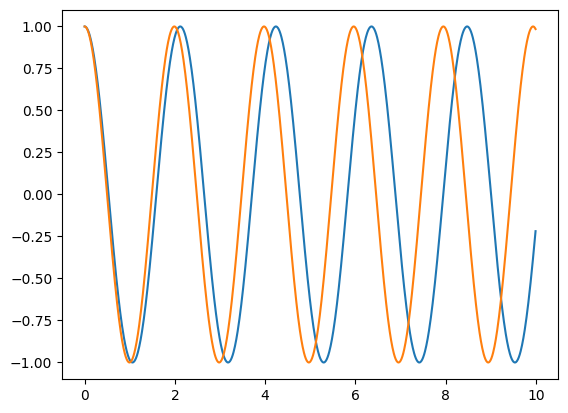

In [ ]:
# Angle vs time
plt.plot(t,theta)
plt.plot(t,theta[0]*np.cos(np.sqrt(g/L)*t))

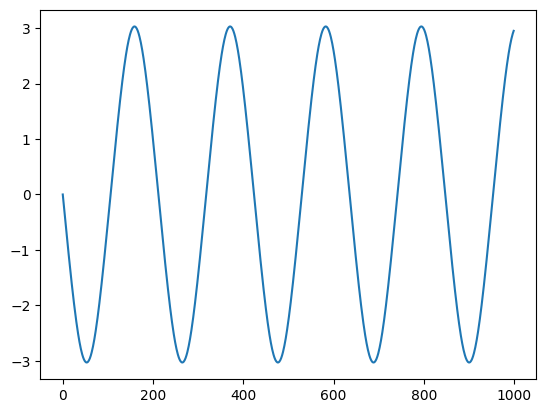

In [ ]:
plt.plot(omega)

As expected, energy is not conserved, but it is more conserved than in Eulers method. The angular velocity remains mostly the same. The energy slowly increases but to see you must wait for absurd timescales.

#SO WHAT?
***
In conclusion, Eulers method works well for something but not others. The lack of correction allows for a breaking of the laws of physics and ultimately faulty results.

RK method increases the accuracy by correcting via taking the midpoint between two steps.

Now to answer the question from the HW assignment:

The frequency of the pendulum does not depend on the amplitude with the assumption of small angles. It only depends on acceleration and pendulum length.

However, when a pendulum has a larger starting angle (not considering small angle approximtion) the pendulum spend more time at its extreme thus resulting in larger periods and hence lower frequency.
